## Feature Extraction Notebook
---

This notebook is used to extract features from the data. The audio is divided into windows of 1 second. The features extracted from each audio window are:
- MFCC (Mel-Frequency Cepstral Coefficients): 20 coefficients
- Chroma STFT: 1 coefficient
- RMS (Root Mean Square) Energy: 1 coefficient
- Spectral Centroid: 1 coefficient
- Spectral Bandwidth: 1 coefficient
- Spectral Roll-off: 1 coefficient
- Zero Crossing Rate: 1 coefficient

In [13]:
# import all the functions
from utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

# -------- tqdm DARK THEME --------

### Features Extraction

In [3]:
# set the paths to data
BASE_DIR = '../dataset/'
ARTIFACTS_DIR = BASE_DIR + 'artifacts/'
EXTRAHLS_DIR = BASE_DIR + 'extrahls/'
MURMURS_DIR = BASE_DIR + 'murmurs/'
NORMALS_DIR = BASE_DIR + 'normals/'
EXTRASTOLES_DIR = BASE_DIR + 'extrastoles/'

# paths to save the features
FEATURES_DIR = '../features/'

In [4]:
# FEATURES EXTRACTION
paths = [ARTIFACTS_DIR, EXTRAHLS_DIR, MURMURS_DIR, NORMALS_DIR, EXTRASTOLES_DIR]
names = ['artifacts', 'extrahls', 'murmurs', 'normals', 'extrastoles']
window_length = 1
sample_rate = 'mix'
n_mfcc = 20
# melkwargs = {'n_fft': 2048, 'hop_length': 512, 'n_mels': 128}

for i, path in enumerate(paths):
     print(i)
     
     # Save the features to a file
     name = f'{names[i]}_{window_length}_{sample_rate}.npz'
     
     if os.path.exists(FEATURES_DIR + name):
          print('The features have already been extracted')
     else:
          print(f'Extracting features from {path}')
          features = extract_features(path, label = i, frame_length = window_length, n_mfcc=n_mfcc)
          
          # Stack the features into a single tensor
          features = torch.cat(features, dim=0)
          print(f'The shape of the {path} features tensor is: {features.shape}')
          
          # if returns None continue
          if save_features(features, FEATURES_DIR, name) == None:
               continue
    
     print('Features extracted and saved')

          

0
Extracting features from ../dataset/artifacts/


Extraction in progress:   0%|          | 0/92 [00:00<?, ?it/s]

Converting stereo audio to mono for artifact_2023_17.wav...


/opt/homebrew/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Converting stereo audio to mono for artifact_2023_16.wav...
Converting stereo audio to mono for artifact_2023_14.wav...


/opt/homebrew/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Converting stereo audio to mono for artifact_2023_15.wav...
Converting stereo audio to mono for artifact_2023_39.wav...
Converting stereo audio to mono for artifact_2023_11.wav...
Converting stereo audio to mono for artifact_2023_38.wav...
Converting stereo audio to mono for artifact_2023_12.wav...
Converting stereo audio to mono for artifact_2023_13.wav...
Converting stereo audio to mono for artifact_2023_49.wav...
Converting stereo audio to mono for artifact_2023_41.wav...
Converting stereo audio to mono for artifact_2023_40.wav...
Converting stereo audio to mono for artifact_2023_42.wav...
Converting stereo audio to mono for artifact_2023_43.wav...
Converting stereo audio to mono for artifact_2023_47.wav...
Converting stereo audio to mono for artifact_2023_46.wav...
Converting stereo audio to mono for artifact_2023_50.wav...
Converting stereo audio to mono for artifact_2023_44.wav...
Converting stereo audio to mono for artifact_2023_45.wav...
Converting stereo audio to mono for arti

Extraction in progress:   0%|          | 0/19 [00:00<?, ?it/s]

No features extracted for extrahls__201104021355.wav. Skipping...
Finished processing all files.

The shape of the ../dataset/extrahls/ features tensor is: torch.Size([124, 28])
Saving features...
2
Extracting features from ../dataset/murmurs/


Extraction in progress:   0%|          | 0/149 [00:00<?, ?it/s]

No features extracted for murmur__201104021355.wav. Skipping...
Converting stereo audio to mono for abnormal_s4_2023_2.wav...
No features extracted for murmur__171_1307971016233_E.wav. Skipping...
Converting stereo audio to mono for atrial_septal_defect_2023_6.wav...
Converting stereo audio to mono for abnormal_s3_2023_1.wav...
Converting stereo audio to mono for mitral_stenosis_2023_9.wav...
Converting stereo audio to mono for abnormal_s3_2023_0.wav...
Converting stereo audio to mono for holosystolic_murmur_2023_7.wav...
Converting stereo audio to mono for aortic_stenosis_2023_4.wav...
Converting stereo audio to mono for mitral_valve_prolapse_2023_10.wav...
Converting stereo audio to mono for innocent_murmur_2023_8.wav...
Finished processing all files.

The shape of the ../dataset/murmurs/ features tensor is: torch.Size([1149, 28])
Saving features...
3
Extracting features from ../dataset/normals/


Extraction in progress:   0%|          | 0/355 [00:00<?, ?it/s]

No features extracted for normal__296_1311682952647_A1.wav. Skipping...
Converting stereo audio to mono for normal_2023_3.wav...
Converting stereo audio to mono for normal_2023_2.wav...
Converting stereo audio to mono for normal_2023_0.wav...
Converting stereo audio to mono for normal_2023_1.wav...
Finished processing all files.

The shape of the ../dataset/normals/ features tensor is: torch.Size([2161, 28])
Saving features...
4
Extracting features from ../dataset/extrastoles/


Extraction in progress:   0%|          | 0/46 [00:00<?, ?it/s]

Finished processing all files.

The shape of the ../dataset/extrastoles/ features tensor is: torch.Size([247, 28])
Saving features...


### Show the features statistics

normals_1_mix.npz features   -   Label: 3.0
Max: 16976.08432112069, Min: -654.86279296875, Mean: 111.12140859068722, Std: 738.1790744503893      -       Shape: (2161, 26)

artifacts_1_mix.npz features   -   Label: 0.0
Max: 21160.455953663793, Min: -1131.369384765625, Mean: 483.97492510688136, Std: 1852.854843619321      -       Shape: (2000, 26)

extrastoles_1_mix.npz features   -   Label: 4.0
Max: 1057.6171875, Min: -309.2425537109375, Mean: 37.46883951805036, Std: 130.15941934366995      -       Shape: (247, 26)

extrahls_1_mix.npz features   -   Label: 1.0
Max: 18953.178879310344, Min: -674.0330810546875, Mean: 753.7483613723052, Std: 2587.231366594324      -       Shape: (124, 26)

murmurs_1_mix.npz features   -   Label: 2.0
Max: 13025.607825969828, Min: -574.7505493164062, Mean: 105.72155305406422, Std: 538.6539669046897      -       Shape: (1149, 26)



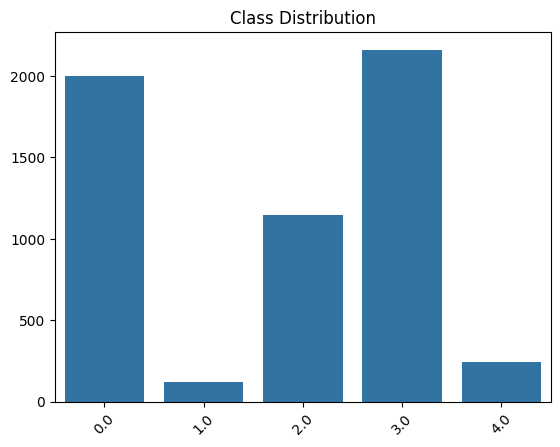

In [34]:
# basics statistics
names = os.listdir(FEATURES_DIR)
shapes = []
name_labels = {}

for name in names:
	features = np.load(FEATURES_DIR + name)['X']
	label = np.load(FEATURES_DIR + name)['y'][0]
	name_labels[name] = label
	max = features.max()
	min = features.min()
	mean = features.mean()
	std = features.std()
	print(f'{name} features   -   Label: {label}')
	print(f'Max: {max}, Min: {min}, Mean: {mean}, Std: {std}      -       Shape: {features.shape}\n')
	shapes.append(features.shape[0])
 
# class distribution
sns.barplot(x = name_labels.values(), y = shapes)
plt.title('Class Distribution')
_ = plt.xticks(rotation=45)